# PCA analysis

In [1]:
## load genotypes
genotypes<-read.table("orca16_filtered.bbgeno",header=T, check.names=F)
head(genotypes)

variant                ref alt ./aligned/SRR8861574_paired
1 NW_004438530.1-1161637 C   T   1.00000                    
2 NW_004438530.1-1161674 C   A   1.00000                    
3 NW_004438530.1-1161645 T   C   1.00000                    
4 NW_004438530.1-3717588 A   T   1.00139                    
5 NW_004438530.1-1156327 G   A   0.99153                    
6 NW_004438530.1-1156484 G   A   0.00526                    
  ./aligned/SRR8861575_paired ./aligned/SRR8861576_paired
1 1.00000                     0.99364                    
2 0.99929                     0.97801                    
3 0.99997                     0.99994                    
4 1.00000                     1.00000                    
5 1.00001                     0.00009                    
6 0.02060                     0.28571                    
  ./aligned/SRR8861577_paired ./aligned/SRR8861578_paired
1 0.28173                     0.03774                    
2 1.00000                     0.96560                    
3 0.95805                     0.41932                    
4 0.99994                     0.10019                    
5 0.00019                     0.00147                    
6 0.99405                     0.04027                    
  ./aligned/SRR8861579_paired ./aligned/SRR8861580_paired
1 0.90785                     0.03774                    
2 0.00280                     0.99929                    
3 0.74192                     0.08333                    
4 1.00000                     1.00000                    
5 0.12850                     0.00037                    
6 0.07726                     0.01043                    
  ./aligned/SRR8861581_paired ./aligned/SRR8861582_paired
1 0.11035                     0.96116                    
2 0.00280                     0.04259                    
3 0.69545                     0.99826                    
4 1.00000                     1.00000                    
5 0.00005                     0.99996                    
6 0.00004                     0.00264                    
  ./aligned/SRR8861583_paired ./aligned/SRR8861586_paired
1 1.00000                     0.00039                    
2 1.00000                     0.00140                    
3 1.00000                     0.03493                    
4 0.99997                     1.00000                    
5 0.00369                     0.00005                    
6 0.00264                     0.84084                    
  ./aligned/SRR8861587_paired ./aligned/SRR8861589_paired
1 0.98995                     0.02415                    
2 0.00557                     0.12332                    
3 0.99972                     0.78351                    
4 1.00000                     1.00000                    
5 0.99999                     0.00019                    
6 1.00000                     0.99624                    
  ./aligned/SRR8861590_paired ./aligned/SRR8861591_paired
1 0.00618                     0.99494                    
2 0.00443                     0.00177                    
3 0.00717                     0.99564                    
4 0.99929                     0.99910                    
5 0.00147                     0.88081                    
6 0.28571                     0.00008                    
  ./aligned/SRR8861592_paired
1 1.00000                    
2 0.63910                    
3 1.00000                    
4 1.00001                    
5 0.31800                    
6 0.00526

In [2]:
pca.genotypes<-prcomp(t(genotypes[,-(1:3)]), center=TRUE, scale=FALSE)

In [3]:
summary(pca.genotypes)

Importance of components:
                            PC1      PC2      PC3      PC4      PC5      PC6
Standard deviation     43.34298 42.92681 41.94759 41.55829 40.95606 40.70547
Proportion of Variance  0.07671  0.07524  0.07185  0.07052  0.06849  0.06766
Cumulative Proportion   0.07671  0.15195  0.22380  0.29432  0.36281  0.43047
                            PC7      PC8      PC9     PC10     PC11     PC12
Standard deviation     40.30756 39.94624 39.75969 39.56831 39.28492 39.20234
Proportion of Variance  0.06634  0.06516  0.06455  0.06393  0.06302  0.06275
Cumulative Proportion   0.49681  0.56197  0.62652  0.69045  0.75346  0.81622
                           PC13     PC14     PC15      PC16
Standard deviation     38.95489 38.67792 38.56725 5.751e-14
Proportion of Variance  0.06196  0.06108  0.06074 0.000e+00
Cumulative Proportion   0.87818  0.93926  1.00000 1.000e+00

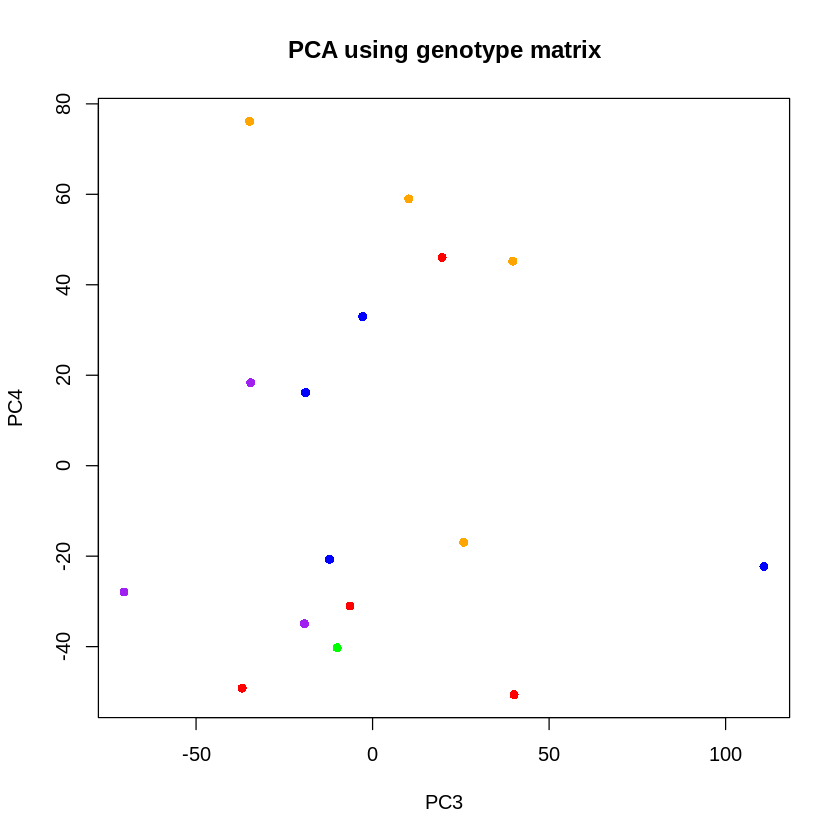

In [4]:
# Get PCs
pcs<-pca.genotypes$x

# Load info about samples
id.info<-read.table("sample_location.tsv", sep="\t", header=T)

# sort as in the pcs
id.info<-id.info[match(rownames(pcs), id.info$run_accession),]

# colours
id.colours<-as.character(id.info$area)
id.colours[id.colours=="Atlantic_Ocean"]<-"red" # Atlantic as red
id.colours[id.colours=="Australasia"]<-"blue" # Australasia as blue
id.colours[id.colours=="Indian_Ocean"]<-"green" # Indian as green
id.colours[id.colours=="Pacific_Ocean"]<-"orange" # Pacific as orange
id.colours[id.colours=="Southern_Ocean"]<-"purple" # Southern as purple

plot(pcs[,1], pcs[,2], main = "PCA using genotype matrix", 
     xlab = "PC1", ylab = "PC2", col=id.colours, pch=16)
plot(pcs[,2], pcs[,3], main = "PCA using genotype matrix", 
     xlab = "PC2", ylab = "PC3", col=id.colours, pch=16)
plot(pcs[,3], pcs[,4], main = "PCA using genotype matrix", 
     xlab = "PC3", ylab = "PC4", col=id.colours, pch=16)